## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

## Information  

|Variable | Type | Description | 
|---|---|---|
|Gender	Feature| 	Categorical|	
|Age	Feature|	Continuous|
|Height	 Feature|	Continuous|	
|Weight	 Feature|	Continuous|		
|family_history_with_overweight	Feature|	Binary|	   Has a family member suffered or suffers from overweight?|
|FAVC Feature	|Binary|		Do you eat high caloric food frequently?|
|FCVC	Feature |	Integer |		Do you usually eat vegetables in your meals?|
|NCP	Feature|	Continuous|		How many main meals do you have daily?|
|CAEC	Feature	|Categorical|		Do you eat any food between meals?|
|SMOKE	Feature |	Binary |		Do you smoke?|	
|CH2O	Feature |	Continuous|		How much water do you drink daily?|
|SCC	Feature	| Binary |		Do you monitor the calories you eat daily?|
|FAF	Feature	| Continuous	|	How often do you have physical activity? |
|TUE	Feature |	Integer		| How much time do you use technological devices such as cell phone, videogames, television, computer and others? |	
|CALC	Feature |	Categorical	|	How often do you drink alcohol?	|
|MTRANS	Feature	| Categorical |		Which transportation do you usually use? |
|NObeyesdad	Target |	Categorical	|	Obesity level |	

#### 1. Load the dataset

In [6]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts
from sklearn.model_selection import train_test_split


In [7]:
# load train and test set
dataset = pd.read_csv("estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/data.csv", sep = ",", skipinitialspace=True)
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [107]:
dataset.shape

(2111, 17)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(dataset.loc[:, dataset.columns != 'NObeyesdad'],dataset['NObeyesdad'], test_size=0.2)
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)
x, y = dataset.loc[:, dataset.columns != 'NObeyesdad'], dataset['NObeyesdad']

In [110]:
x_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1658,Male,30.424369,1.699354,100.176866,yes,yes,2.819934,1.918630,Sometimes,no,1.000000,no,1.393020,0.553311,no,Public_Transportation
1617,Male,40.973007,1.749405,109.908779,yes,yes,2.176317,2.986637,Sometimes,no,1.015672,no,0.941410,0.000000,no,Automobile
1020,Female,25.483381,1.565288,64.848627,yes,no,2.000000,1.000000,Sometimes,no,1.000000,no,0.740633,0.000000,no,Public_Transportation
1213,Female,31.386405,1.556579,78.233341,yes,yes,2.136830,2.092179,Sometimes,no,1.505381,no,0.000000,0.000000,Sometimes,Public_Transportation
1844,Female,26.000000,1.618573,104.928643,yes,yes,3.000000,3.000000,Sometimes,no,1.698767,no,0.000000,0.543960,Sometimes,Public_Transportation


In [111]:
# dimensions of dataset
print("#Train-samples = ", train.shape[0])
print("#Train-features = ", train.shape[1])
print("#Test-samples = ", test.shape[0])
print("#Test-features = ", test.shape[1])

#Train-samples =  1688
#Train-features =  17
#Test-samples =  423
#Test-features =  17


In [112]:
# definition of preprocessor
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(train)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 17 
 Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Numerical features: 
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: 
 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


#### 2. Data Cleaning

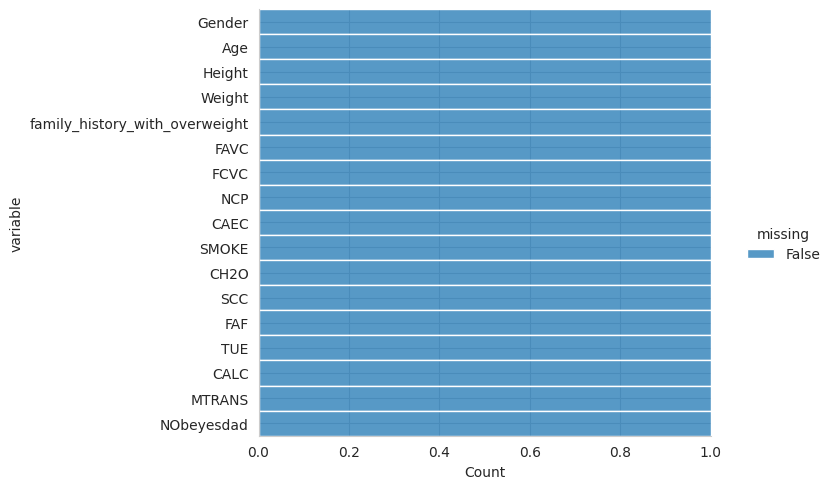

In [113]:
dp.filter_missing(dataset)

#### 3. Exploratory Data Analysis

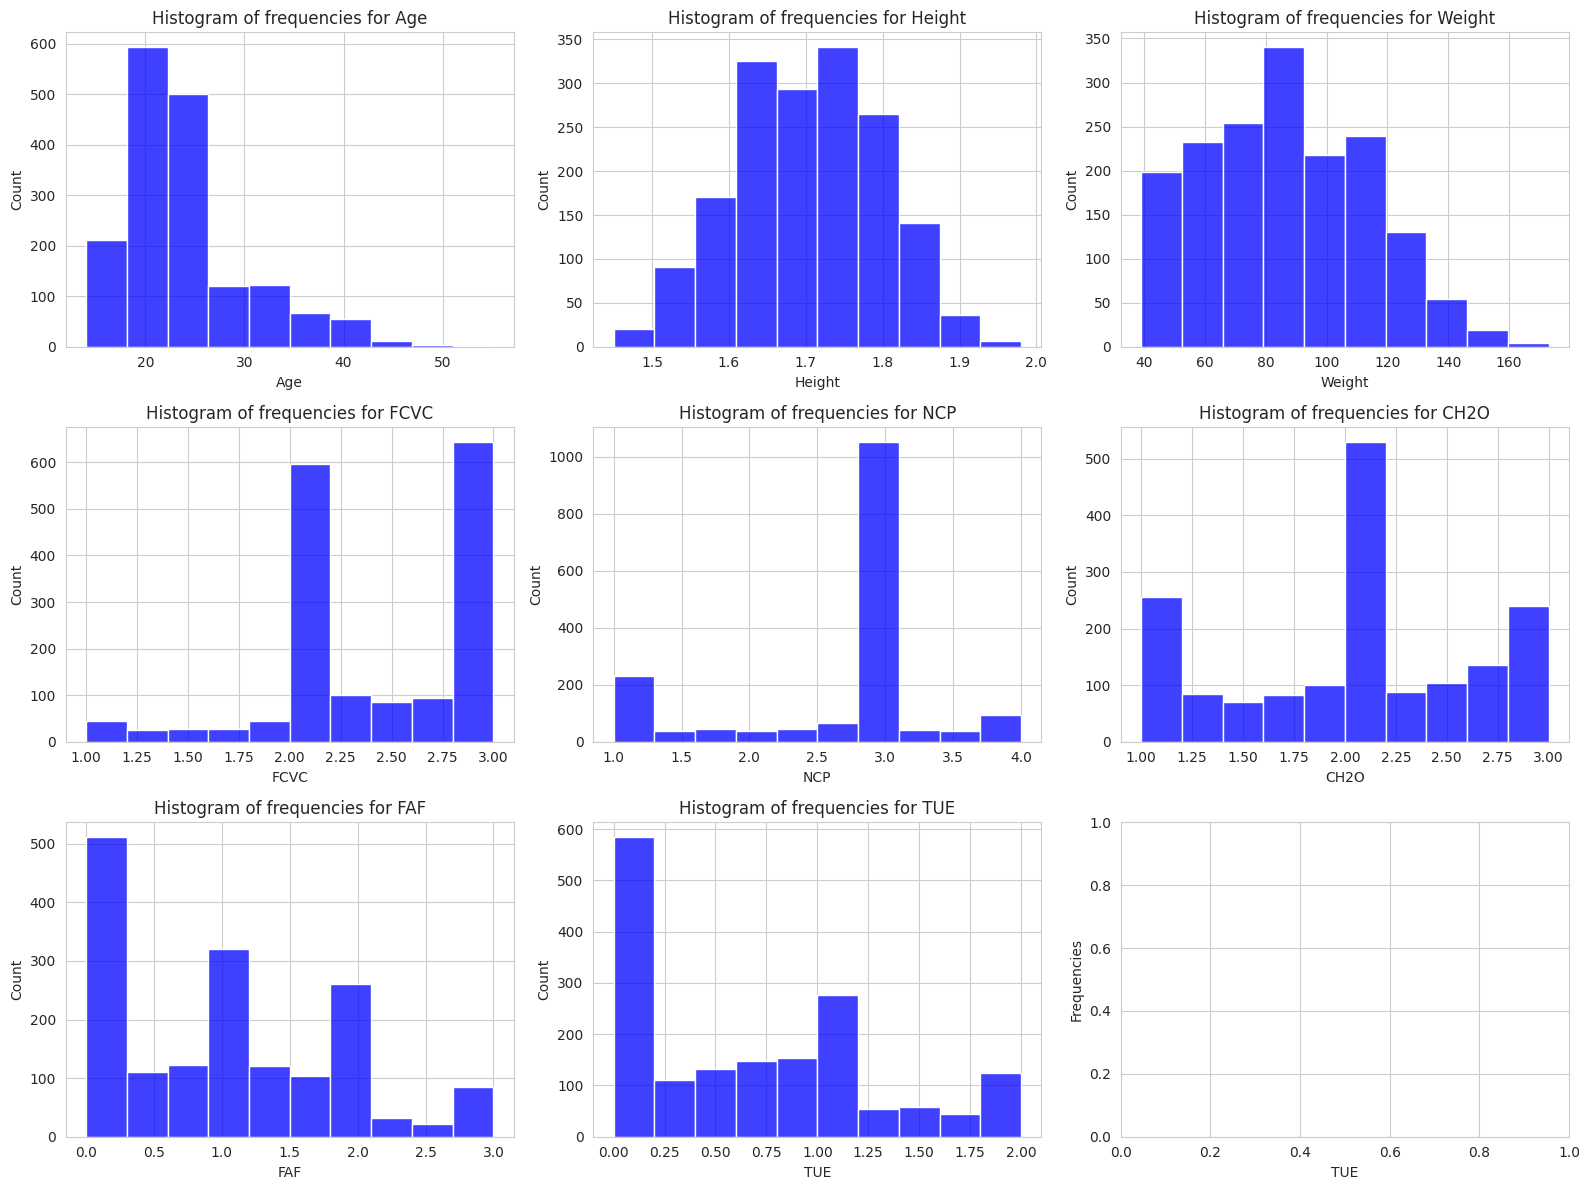

In [114]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(train, num_cols, bins = 10)

In [115]:
# check the behavior of categorical features
dp.get_categorical_instances(train, cat_cols)


***** Gender ******
Gender
Male      867
Female    821
Name: count, dtype: int64

***** family_history_with_overweight ******
family_history_with_overweight
yes    1379
no      309
Name: count, dtype: int64

***** FAVC ******
FAVC
yes    1498
no      190
Name: count, dtype: int64

***** CAEC ******
CAEC
Sometimes     1422
Frequently     184
Always          44
no              38
Name: count, dtype: int64

***** SMOKE ******
SMOKE
no     1654
yes      34
Name: count, dtype: int64

***** SCC ******
SCC
no     1618
yes      70
Name: count, dtype: int64

***** CALC ******
CALC
Sometimes     1123
no             508
Frequently      57
Name: count, dtype: int64

***** MTRANS ******
MTRANS
Public_Transportation    1257
Automobile                372
Walking                    44
Motorbike                   9
Bike                        6
Name: count, dtype: int64

***** NObeyesdad ******
NObeyesdad
Obesity_Type_I         284
Obesity_Type_III       251
Obesity_Type_II        245
Overweight_Level

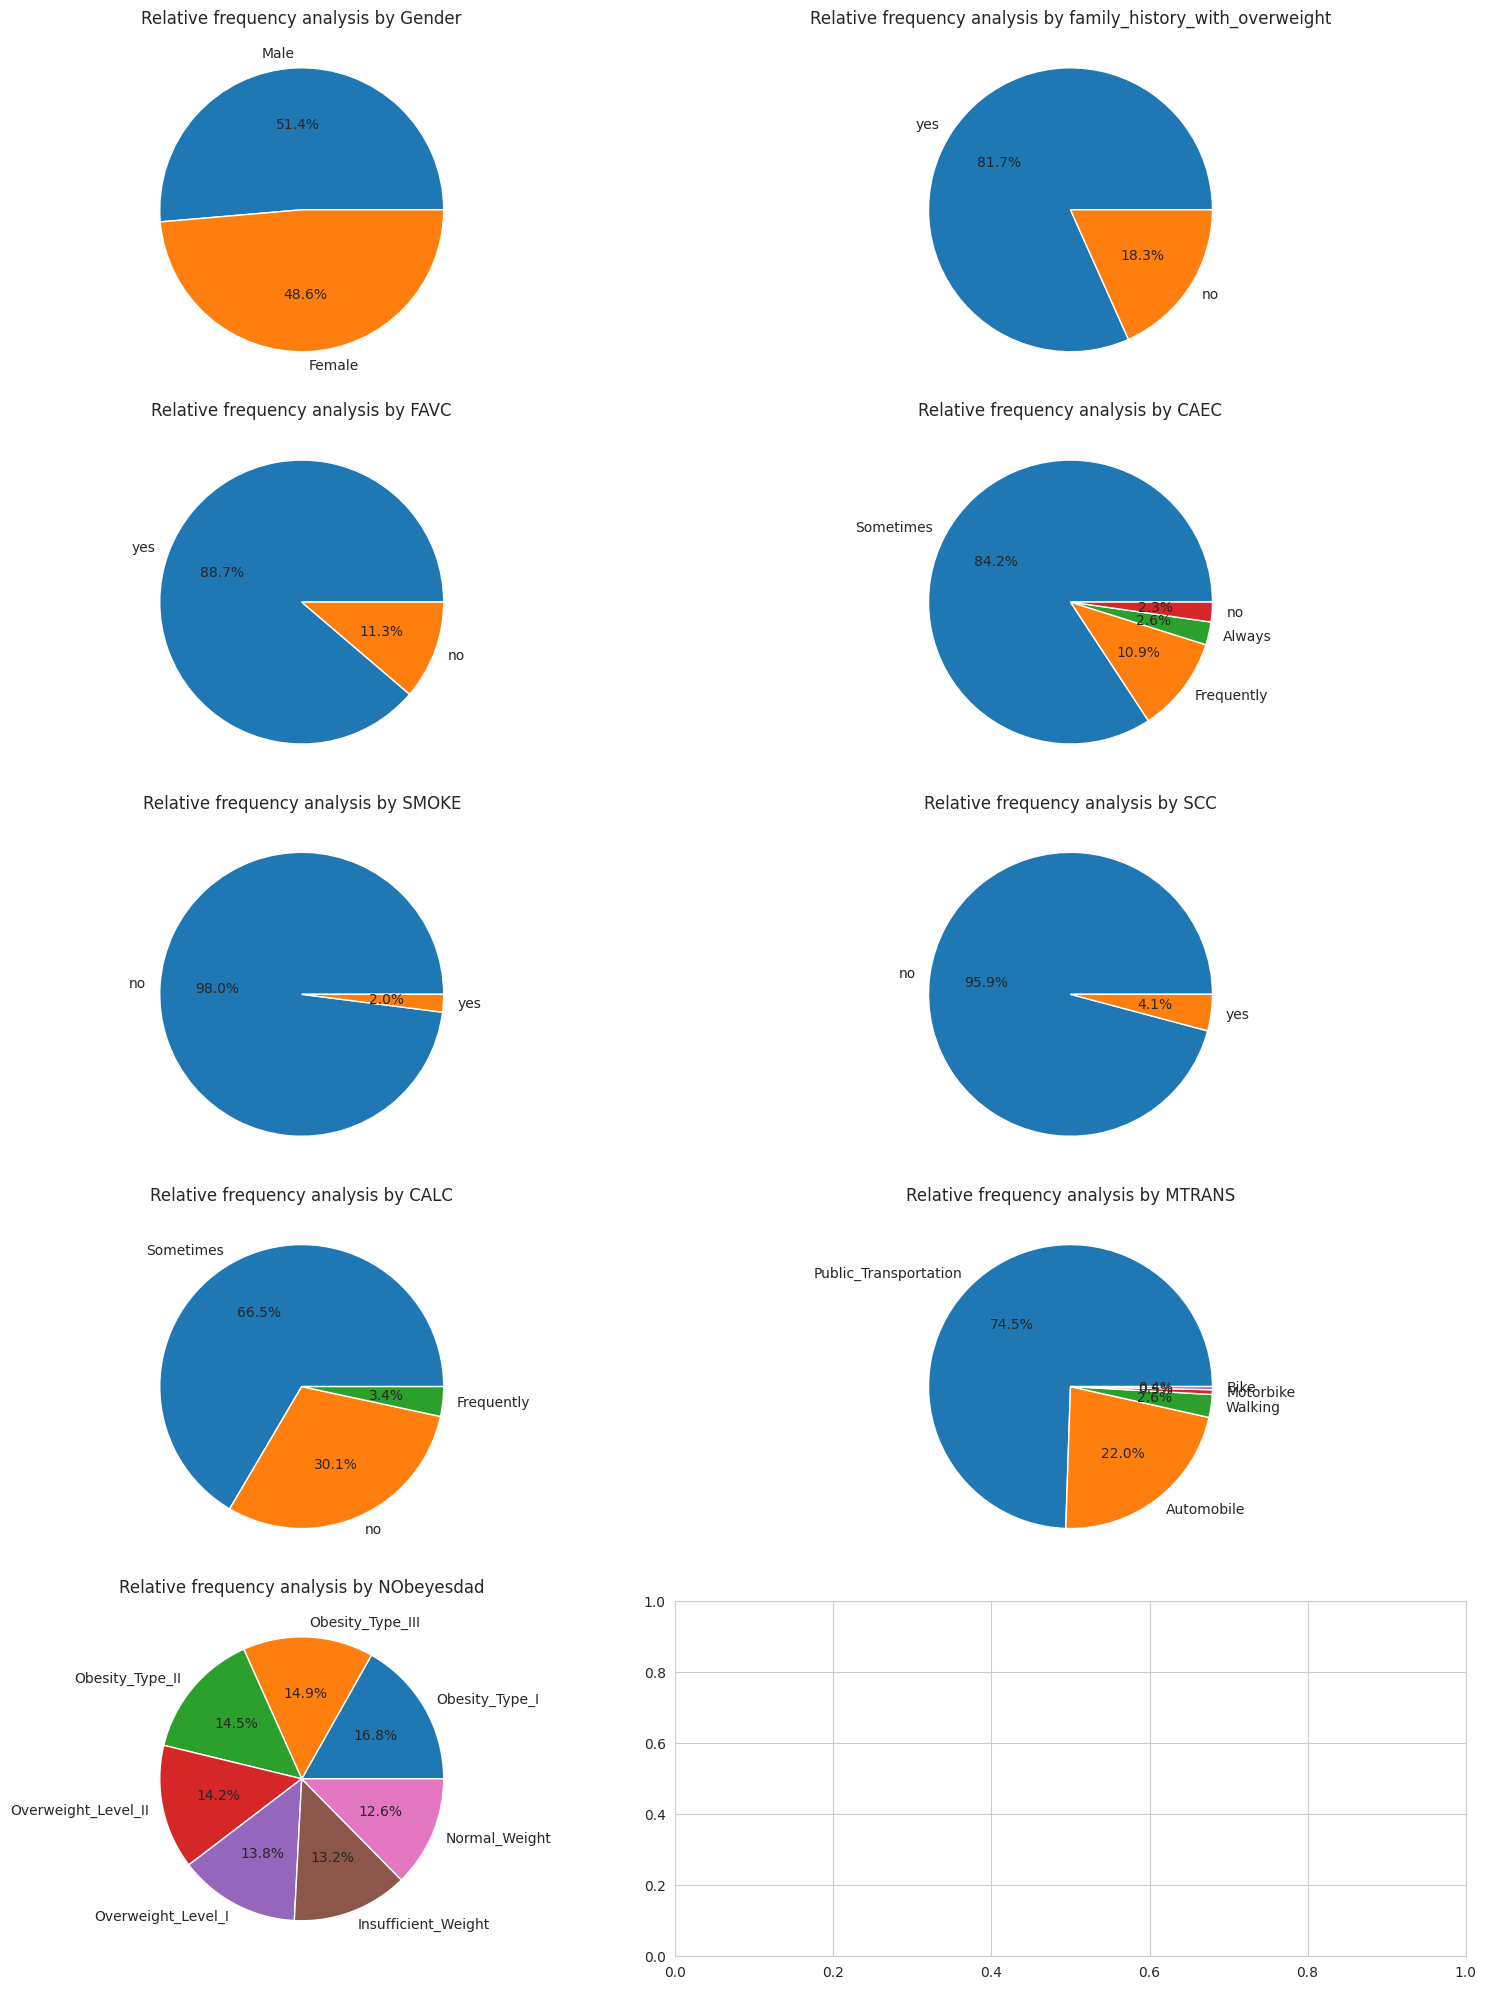

In [116]:
# iteratively pie chart
dp.iter_piechart(train, cat_cols)

#### 4. Data preprocessing

In [117]:
x_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1122,Male,21.384259,1.780679,89.667406,yes,yes,1.780746,1.471053,Sometimes,no,2.0,no,0.467562,0.568668,Sometimes,Public_Transportation
772,Male,20.000000,1.831357,89.652557,yes,yes,2.555401,3.292386,Sometimes,no,3.0,no,2.000000,0.315918,Sometimes,Public_Transportation
918,Female,21.996118,1.730199,78.997062,yes,yes,2.277077,1.000000,Sometimes,no,2.0,no,1.061743,0.000000,Sometimes,Public_Transportation
1022,Female,23.469538,1.507106,64.814109,yes,no,2.252472,3.986652,Sometimes,no,2.0,no,0.934286,0.890626,no,Public_Transportation
637,Male,18.000000,1.845399,60.000000,yes,yes,3.000000,4.000000,Sometimes,no,2.0,no,2.000000,0.000000,no,Automobile


Split train and test set

In [118]:
print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (1688, 16)
Y-train:  1688
X-test dim:  (423, 16)
Y-test:  423


Transforming the numerical and categorical features  

* Numerical features: 
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
 
* Categorical features: 
 ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'] 

In [119]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(),  ['Age', 'Height', 'Weight']),  
    (RobustScaler(), ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']),
    (OneHotEncoder(handle_unknown="ignore"),  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'] )    
)

In [120]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Age', 'Height', 'Weight']),
                                ('robustscaler', RobustScaler(),
                                 ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'family_history_with_overweight',
                                  'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
                                  'MTRANS'])])

In [121]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [122]:
x_train

array([[-0.45999351,  0.81827921,  0.10952477, ...,  0.        ,
         1.        ,  0.        ],
       [-0.68470314,  1.35712121,  0.10896115, ...,  0.        ,
         1.        ,  0.        ],
       [-0.36066918,  0.28154248, -0.29549212, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.52700906, -1.64177831, -1.71659609, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52237107,  0.49207981,  0.04623463, ...,  0.        ,
         1.        ,  0.        ],
       [-1.01398173,  0.17712975, -0.06763712, ...,  0.        ,
         1.        ,  0.        ]])

In [123]:
y_train

1122    Overweight_Level_II
772      Overweight_Level_I
918      Overweight_Level_I
1022    Overweight_Level_II
637     Insufficient_Weight
               ...         
679     Insufficient_Weight
1340         Obesity_Type_I
614     Insufficient_Weight
39      Overweight_Level_II
1035    Overweight_Level_II
Name: NObeyesdad, Length: 1688, dtype: object

In [124]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


#### 5. Building Models

Benchmark for Models
* KNN
* SVM
* Random Forest
* XGBoost Classifier
* LightGBM Classifier

In [30]:
%reload_ext autoreload
%autoreload 2

##### KNN Classifier

In [31]:
from scripts.classifiers import KNNModel
import time

# train model
sttrain_knn = time.time()
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# calculate time
ettrain_knn = time.time()
ttrain_knn = ettrain_knn - sttrain_knn
print(f"Time of training KNN: {ttrain_knn:.3f} seconds")

/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/pyt

Best KNN Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Time of training KNN: 5.178 seconds


/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.82642881 0.85190245 0.81102839 0.83412814        nan 0.87736906
        nan 0.87144488 0.82642881 0.85190245 0.81102839 0.83412814
 0.86136288 0.87736906 0.84774112 0.87144488 0.82642881 0.85190245
 0.81102839 0.83412814 0.86136288 0.87736906 0.84774112 0.87144488]
  warnings.warn(


In [32]:
knn_model

KNeighborsClassifier(metric='manhattan', weights='distance')

In [33]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  ['Insufficient_Weight' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_I' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_I' 'Obesity_Type_III' 'Obesity_Type_II'
 'Obesity_Type_III']
predicted values in train:  ['Insufficient_Weight' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_I' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_I' 'Obesity_Type_III' 'Obesity_Type_II'
 'Obesity_Type_III']
real values in test:  ['Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_III'
 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_I'
 'Overweight_Level_I' 'Overweight_Level_II' 'Normal_Weight'
 'Insufficient_Weight']
predicted values in test:  ['Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_III'
 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_I'
 'Overweight_Level_I' 'Overweight_Level_II' 'Normal_Weight'
 'Insufficient_Weight']


In [34]:
# deploy knn model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

In [35]:
# evaluate knn model
from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

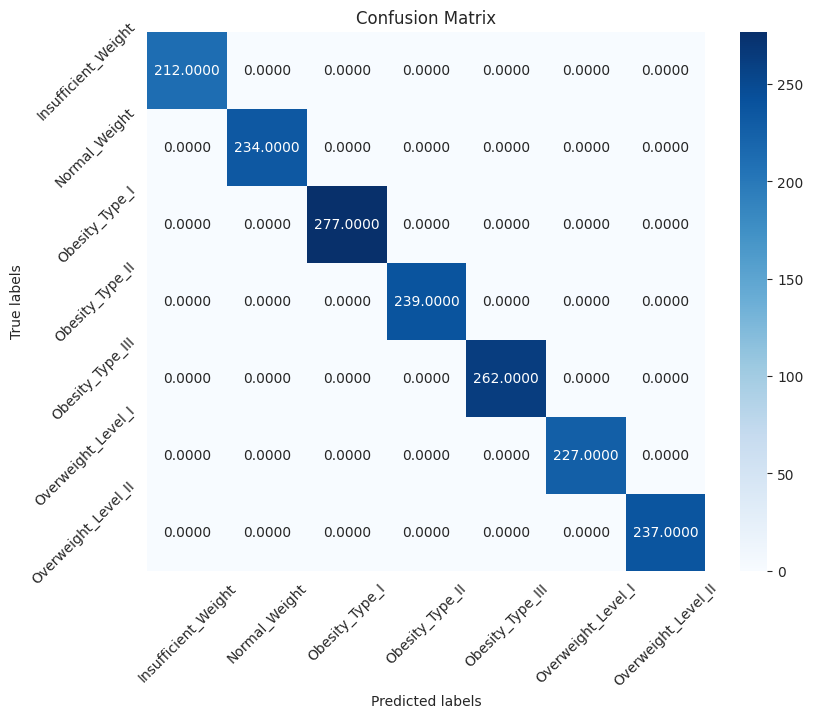

In [36]:
# get confusion matrix in training
y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

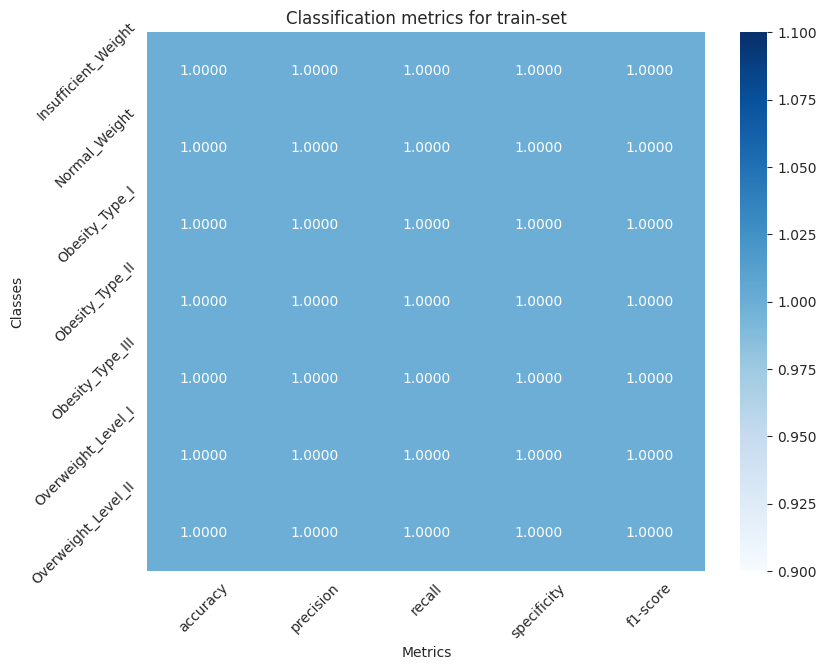

In [37]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

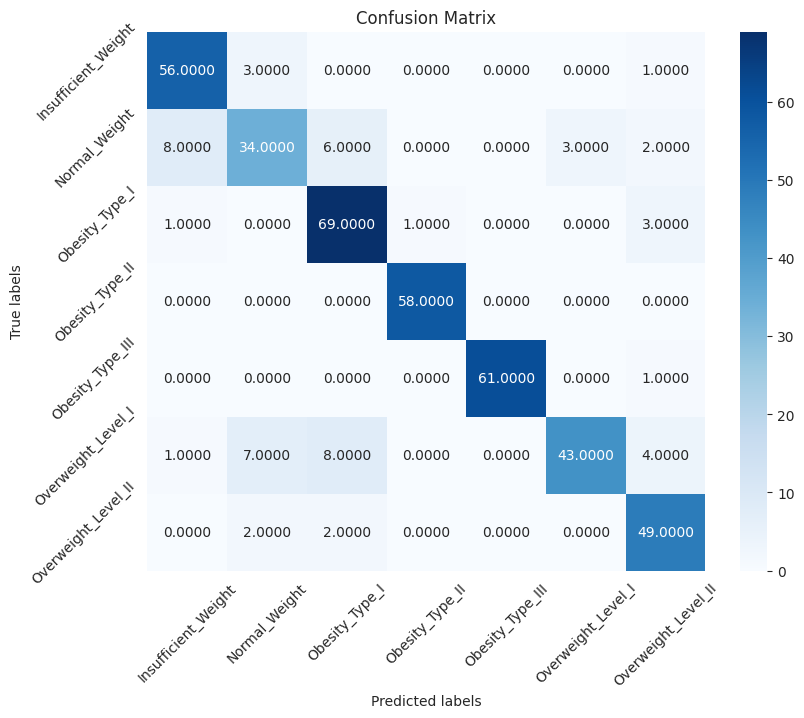

In [38]:
# get confusion matrix in testing
y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

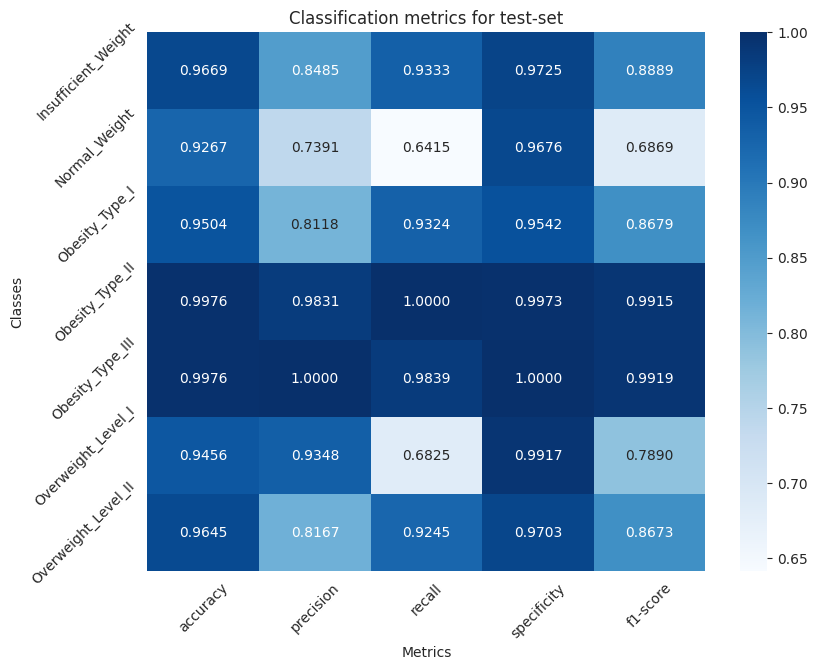

In [39]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

In [40]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.874704,0.876269,0.871173,0.979053,0.869036


##### SVM Classifier

In [53]:
from scripts.classifiers import SVMModel
import time

# train model
sttrain_svm = time.time()
svm = SVMModel()
svm_model = svm.train(x_train, y_train)

# calculate time
ettrain_svm = time.time()
ttrain_svm = ettrain_svm - sttrain_svm
print(f"Time of training SVM: {ttrain_svm:.3f} seconds")

Best SVM Parameters: {'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Time of training SVM: 7.105 seconds


In [42]:
svm_model

SVC(C=10, class_weight='balanced', degree=2, kernel='linear')

In [31]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  ['Normal_Weight' 'Insufficient_Weight' 'Insufficient_Weight'
 'Obesity_Type_I' 'Obesity_Type_I' 'Obesity_Type_I' 'Obesity_Type_II'
 'Overweight_Level_II' 'Obesity_Type_III' 'Overweight_Level_II']
predicted values in train:  ['Normal_Weight' 'Insufficient_Weight' 'Insufficient_Weight'
 'Obesity_Type_I' 'Obesity_Type_I' 'Obesity_Type_I' 'Obesity_Type_II'
 'Overweight_Level_II' 'Obesity_Type_III' 'Overweight_Level_II']
real values in test:  ['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_II'
 'Overweight_Level_I' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_II' 'Overweight_Level_I' 'Normal_Weight'
 'Overweight_Level_I']
predicted values in test:  ['Obesity_Type_II' 'Obesity_Type_I' 'Overweight_Level_II'
 'Overweight_Level_I' 'Overweight_Level_II' 'Obesity_Type_I'
 'Overweight_Level_II' 'Overweight_Level_I' 'Normal_Weight'
 'Overweight_Level_I']


In [54]:
# deploy svm model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

In [55]:
# evaluate svm model
from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

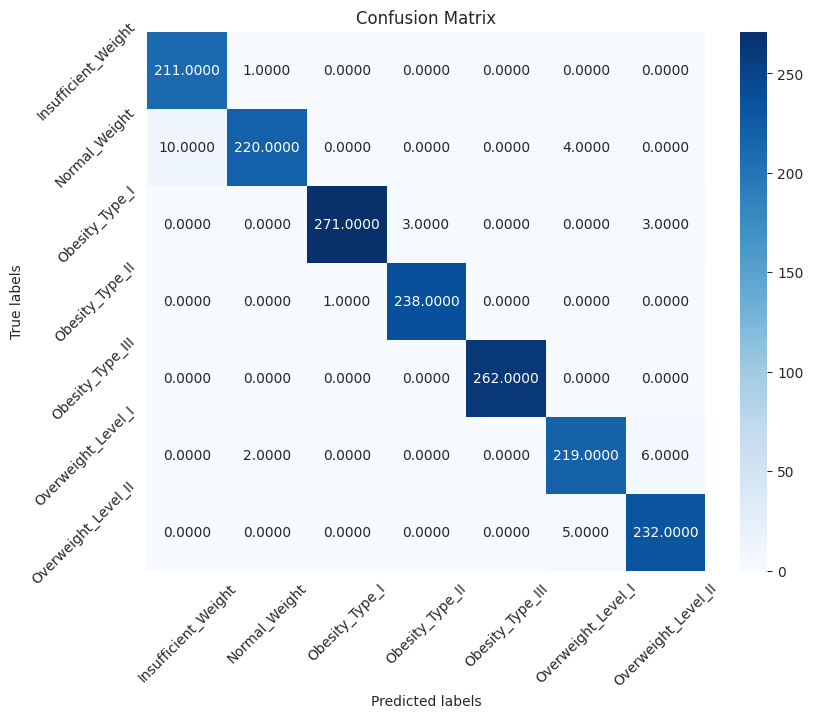

In [57]:
# get confusion matrix in training
y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

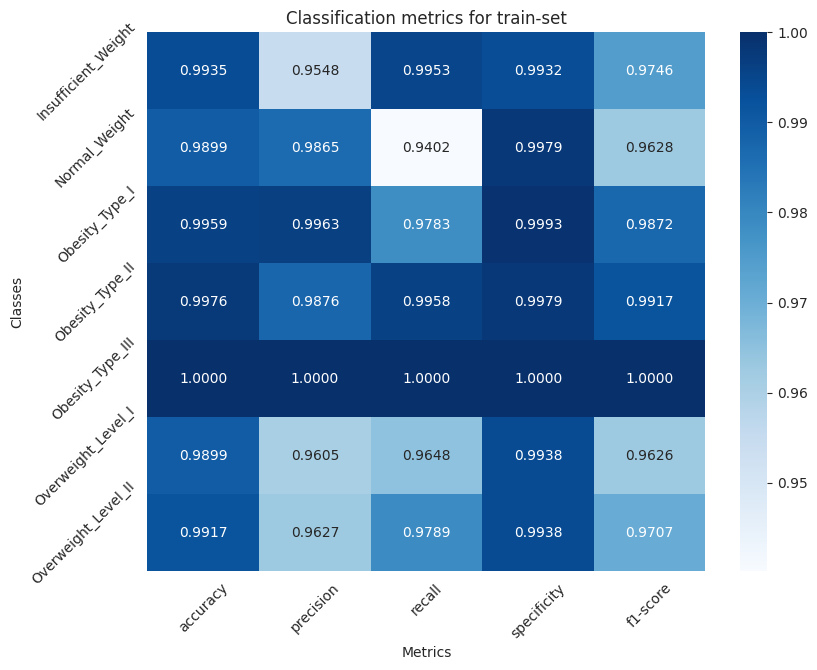

In [58]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

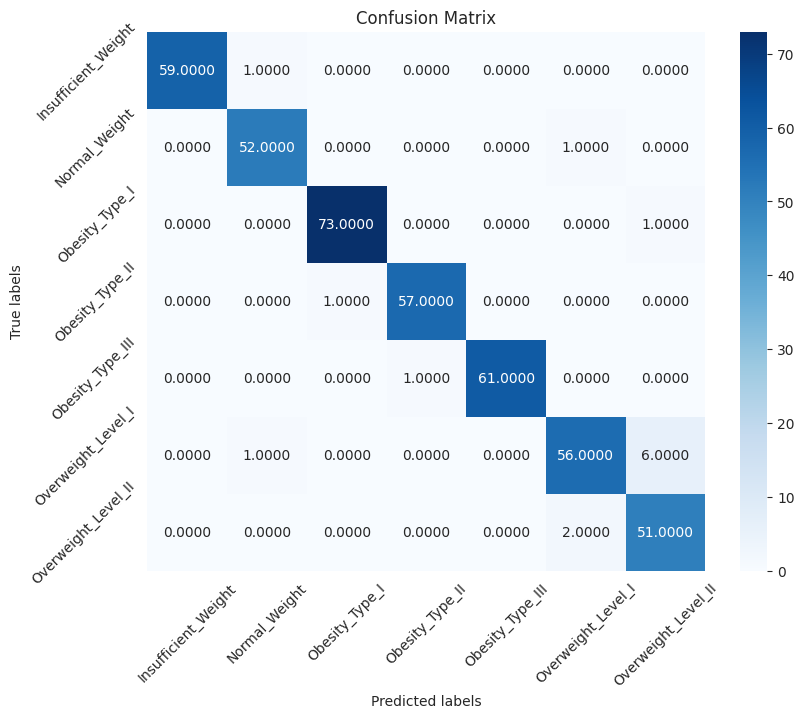

In [59]:
# get confusion matrix in testing
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_test, classes)

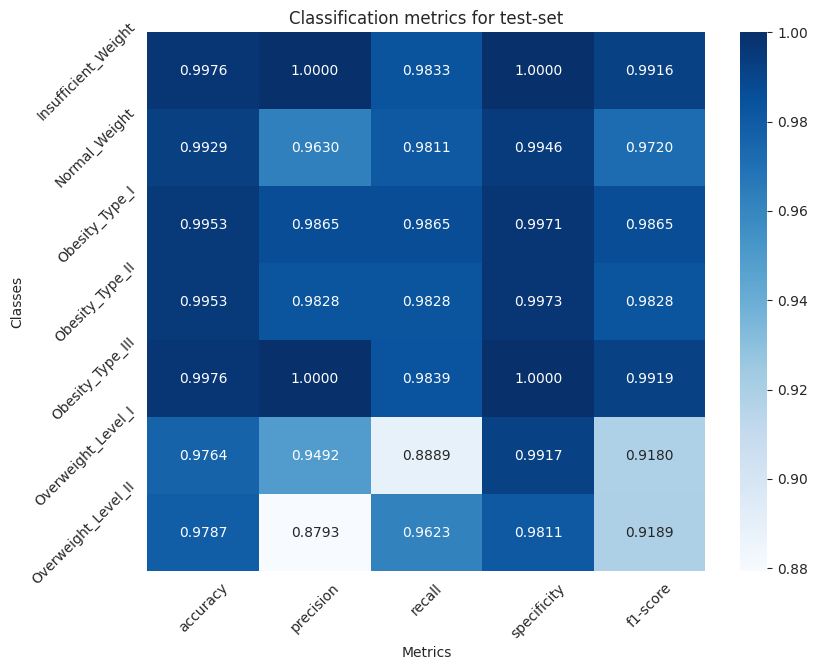

In [60]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

In [61]:
# calculate the metrics for whole test set
eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.966903,0.96581,0.966962,0.994534,0.965947


##### Random Forest Classifier

In [62]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

/home/user/Projects/GitHubProjects/specialized-homework/.venv/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}
Time of training Random Forest: 22.374 seconds


In [63]:
rf_model

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=40)

In [64]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  ['Insufficient_Weight' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_I' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_I' 'Obesity_Type_III' 'Obesity_Type_II'
 'Obesity_Type_III']
predicted values in train:  ['Insufficient_Weight' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_I' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_I' 'Obesity_Type_III' 'Obesity_Type_II'
 'Obesity_Type_III']
real values in test:  ['Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_III'
 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_I'
 'Overweight_Level_I' 'Overweight_Level_II' 'Normal_Weight'
 'Insufficient_Weight']
predicted values in test:  ['Obesity_Type_III' 'Overweight_Level_I' 'Obesity_Type_III'
 'Overweight_Level_I' 'Obesity_Type_I' 'Obesity_Type_I'
 'Overweight_Level_I' 'Overweight_Level_II' 'Normal_Weight'
 'Insufficient_Weight']


In [65]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

In [66]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

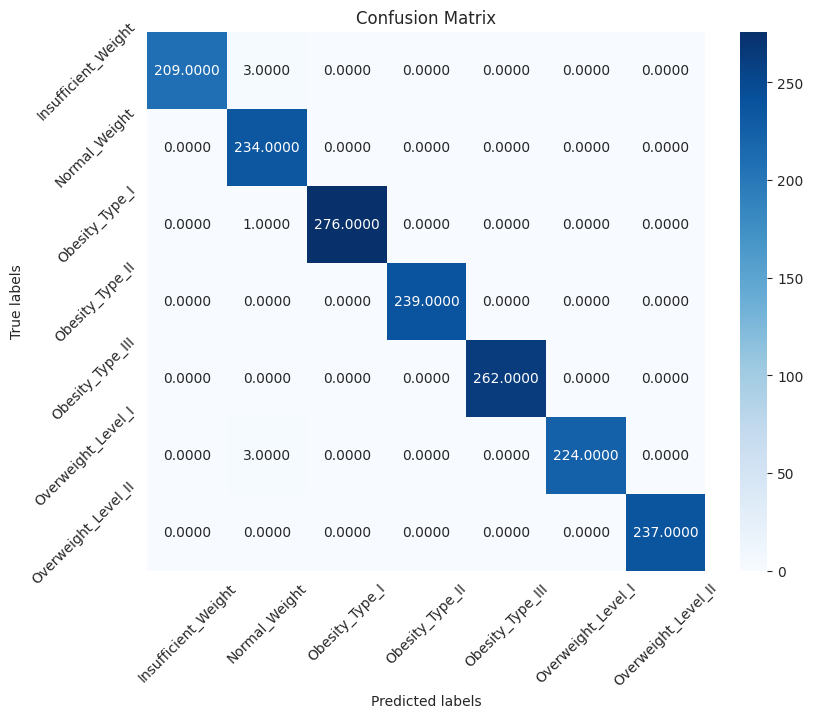

In [67]:
# get confusion matrix in training
y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

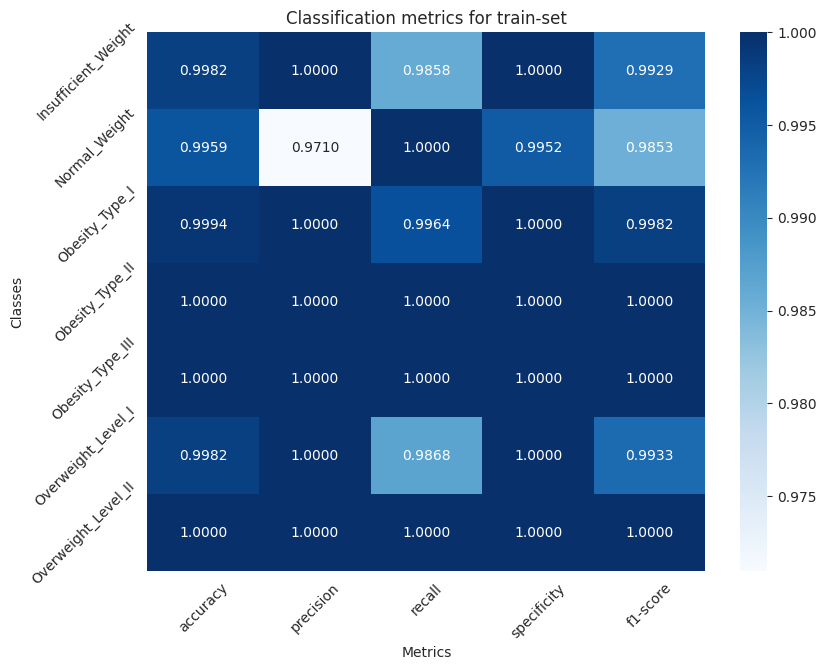

In [68]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

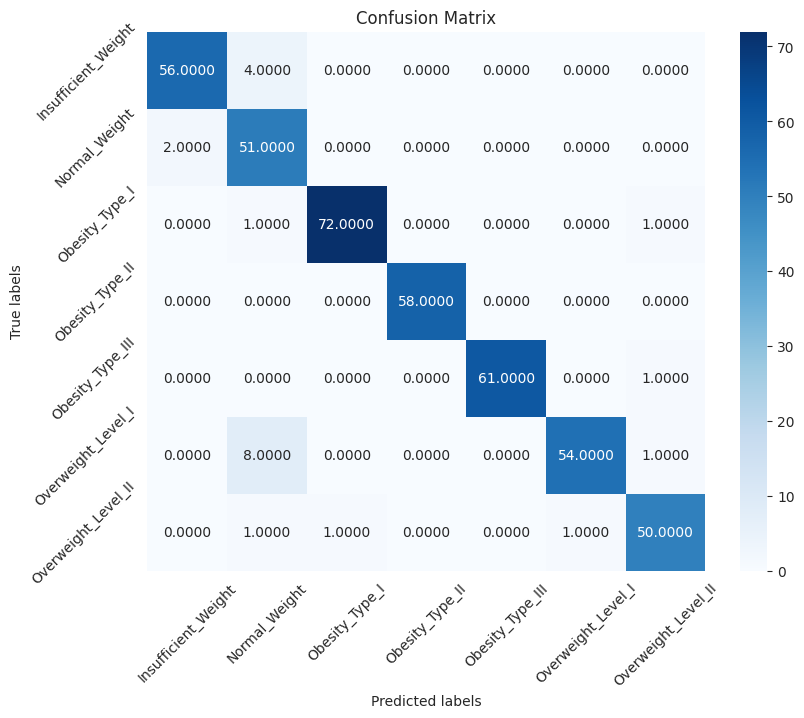

In [70]:
# get confusion matrix in testing
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

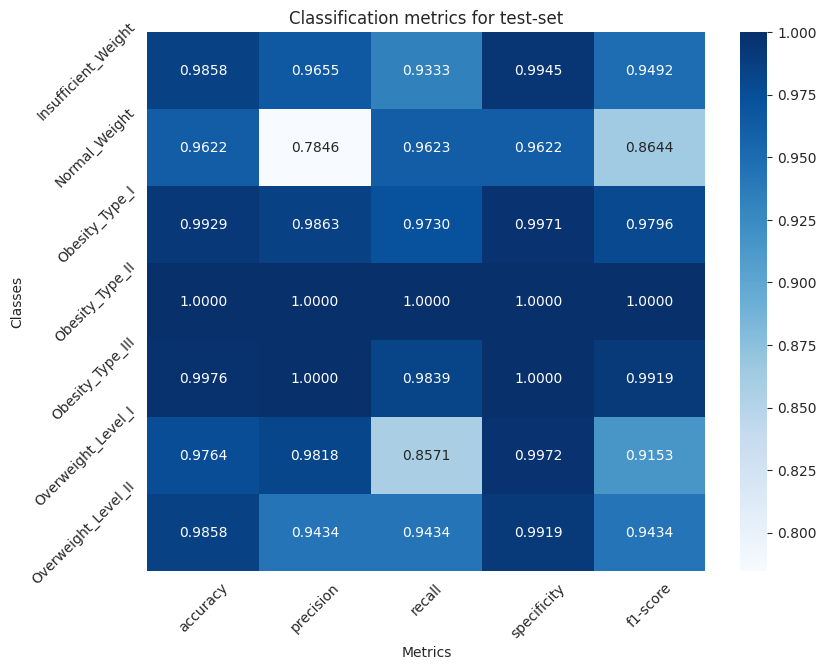

In [71]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

In [72]:
# calculate the metrics for whole test set
eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.950355,0.951664,0.950426,0.991843,0.949096


##### XGBoost Classifier

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_l = le.fit_transform(y_train)

In [75]:
from scripts.classifiers import XGBoostModel
import time

# train model
sttrain_xg = time.time()
xg = XGBoostModel()
xg_model = xg.train(x_train, y_train_l)

# calculate time
ettrain_xg = time.time()
ttrain_xg = ettrain_xg - sttrain_xg
print(f"Time of training XGBoost: {ttrain_xg:.3f} seconds")

Best XGBoost Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 16, 'n_estimators': 100, 'subsample': 0.7}
Time of training XGBoost: 84.190 seconds


In [76]:
xg_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [79]:
# make predictions
print("real values in train: ", le.fit_transform(y_train[0:10].values))
print("predicted values in train: ", xg_model.predict(x_train[0:10]))
print("real values in test: ", le.fit_transform(y_test[0:10].values))
print("predicted values in test: ", xg_model.predict(x_test[0:10]))

real values in train:  [0 3 4 1 4 1 4 3 2 3]
predicted values in train:  [0 4 5 2 5 2 5 4 3 4]
real values in test:  [3 4 3 4 2 2 4 5 1 0]
predicted values in test:  [4 5 4 5 2 2 5 6 1 0]


In [80]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="xg_v1.pkl", model=xg_model)

In [82]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_xg = DeployClassifier(path = "models").load_model(filename="xg_v1.pkl")
eval_xg = EvalClassifier(model = rec_xg)

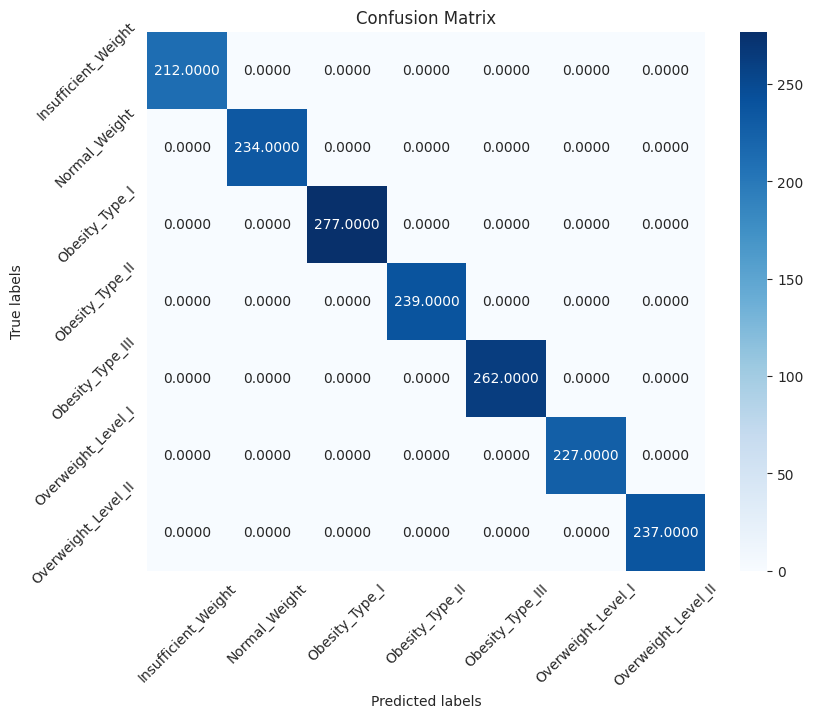

In [93]:
# get confusion matrix in training
y_pred = rec_xg.predict(x_train)
cmxg_train = eval_xg.get_confusion_matrix(le.fit_transform(y_train), y_pred, le.fit_transform(classes))
eval_xg.plot_confusion_matrix(cmxg_train, classes)

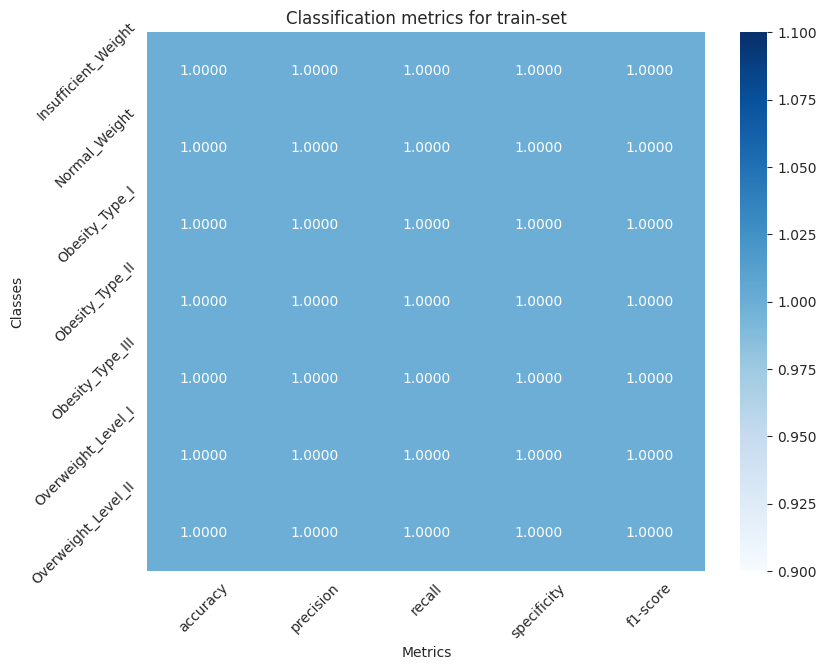

In [94]:
metrics_train_xg = eval_knn.calculate_metrics_by_class(cmxg_train, classes)
eval_xg.plot_metrics_by_class(metrics_train_xg, "Classification metrics for train-set")

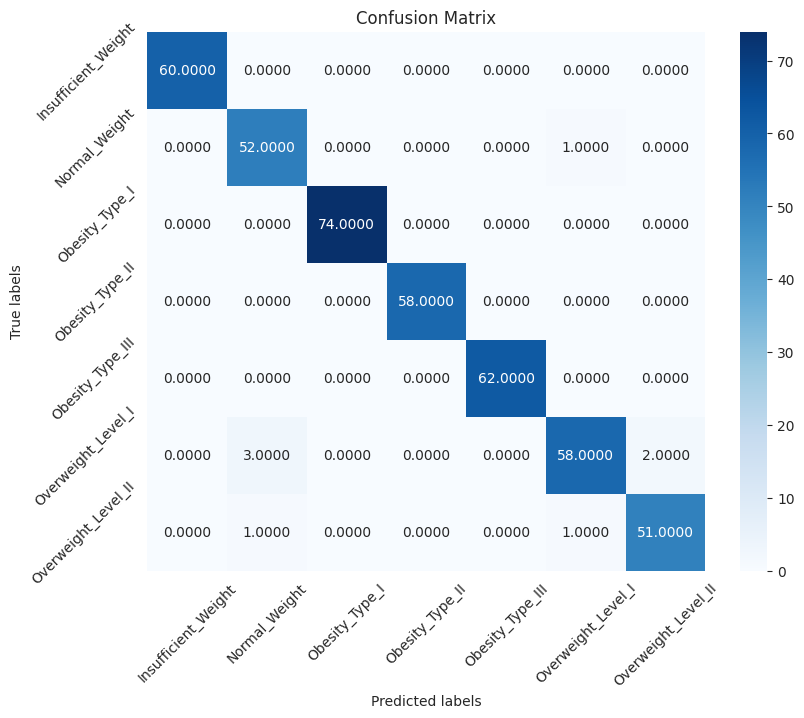

In [95]:
# get confusion matrix in testing
y_pred = rec_xg.predict(x_test)
cmxg_test = eval_xg.get_confusion_matrix(le.fit_transform(y_test), y_pred, le.fit_transform(classes))
eval_xg.plot_confusion_matrix(cmxg_test, classes)

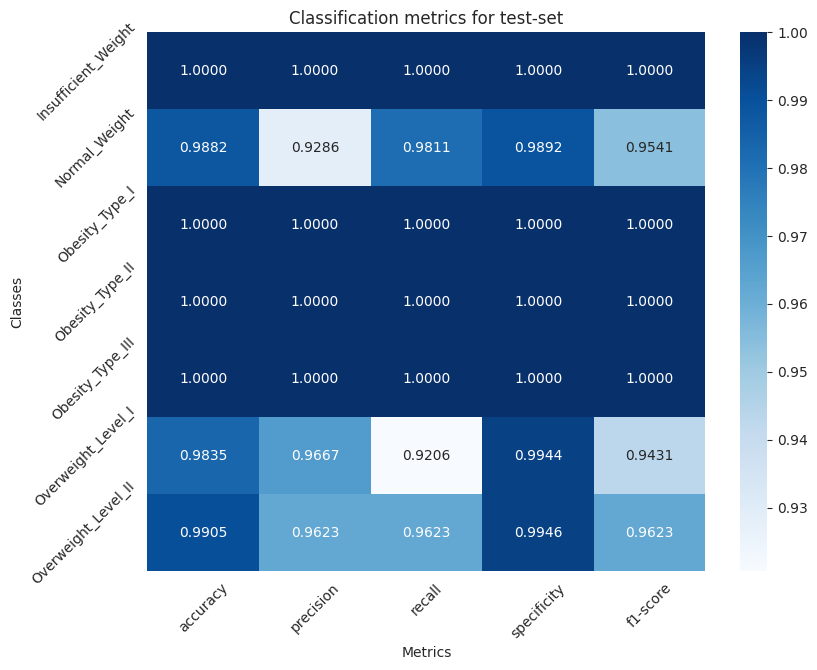

In [96]:
metrics_test_xg = eval_xg.calculate_metrics_by_class(cmxg_test, classes)
eval_xg.plot_metrics_by_class(metrics_test_xg, "Classification metrics for test-set")

In [99]:
# calculate the metrics for whole test set
eval_xg.calculate_metrics_xall(cmxg_test, metrics_test_xg)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.981087,0.979643,0.980576,0.99689,0.979926


##### LightGBM Classifier

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_l = le.fit_transform(y_train)

In [126]:
from scripts.classifiers import LightGBMModel
import time

# train model
sttrain_lgb = time.time()
lgb = LightGBMModel()
lgb_model = lgb.train(x_train, y_train_l)

# calculate time
ettrain_lgb = time.time()
ttrain_lgb = ettrain_lgb - sttrain_lgb
print(f"Time of training XGBoost: {ttrain_lgb:.3f} seconds")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2009
[LightGBM] [Info] Number of data points in the train set: 1351, number of used features: 28
[LightGBM] [Info] Start training from score -2.026817
[LightGBM] [Info] Start training from score -2.066937
[LightGBM] [Info] Start training from score -1.783650
[LightGBM] [Info] Start training from score -1.930486
[LightGBM] [Info] Start training from score -1.905295
[LightGBM] [Info] Start training from score -1.982854
[LightGBM] [Info] Start training from score -1.951105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

KeyboardInterrupt: 

In [ ]:
lgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# make predictions
print("real values in train: ", le.fit_transform(y_train[0:10].values))
print("predicted values in train: ", xg_model.predict(x_train[0:10]))
print("real values in test: ", le.fit_transform(y_test[0:10].values))
print("predicted values in test: ", xg_model.predict(x_test[0:10]))

real values in train:  [0 3 4 1 4 1 4 3 2 3]
predicted values in train:  [0 4 5 2 5 2 5 4 3 4]
real values in test:  [3 4 3 4 2 2 4 5 1 0]
predicted values in test:  [4 5 4 5 2 2 5 6 1 0]


In [ ]:
# deploy rf model
from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="xg_v1.pkl", model=xg_model)

In [ ]:
# evaluate rf model
from scripts.evaluator import EvalClassifier
rec_xg = DeployClassifier(path = "models").load_model(filename="xg_v1.pkl")
eval_xg = EvalClassifier(model = rec_xg)

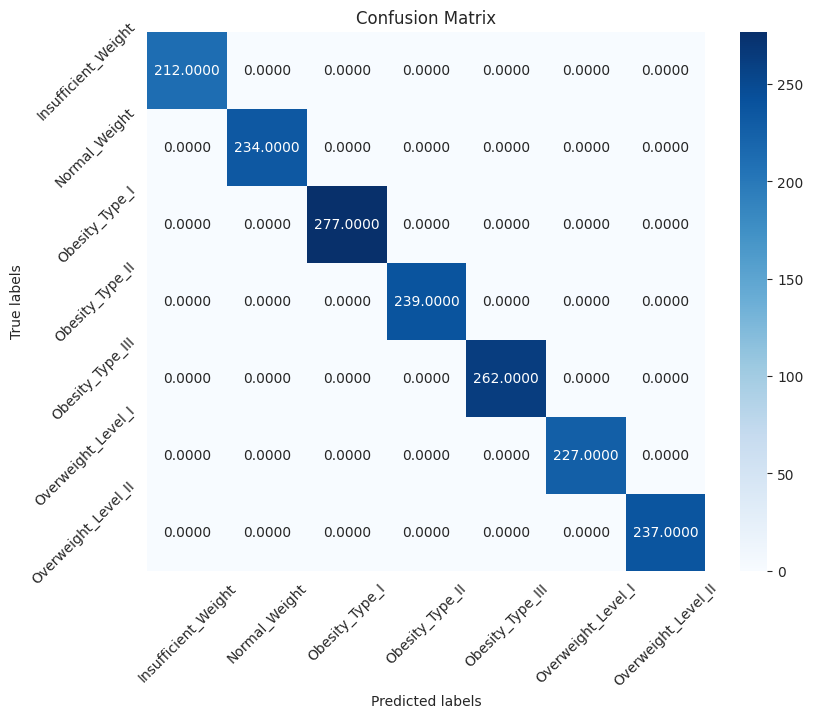

In [ ]:
# get confusion matrix in training
y_pred = rec_xg.predict(x_train)
cmxg_train = eval_xg.get_confusion_matrix(le.fit_transform(y_train), y_pred, le.fit_transform(classes))
eval_xg.plot_confusion_matrix(cmxg_train, classes)

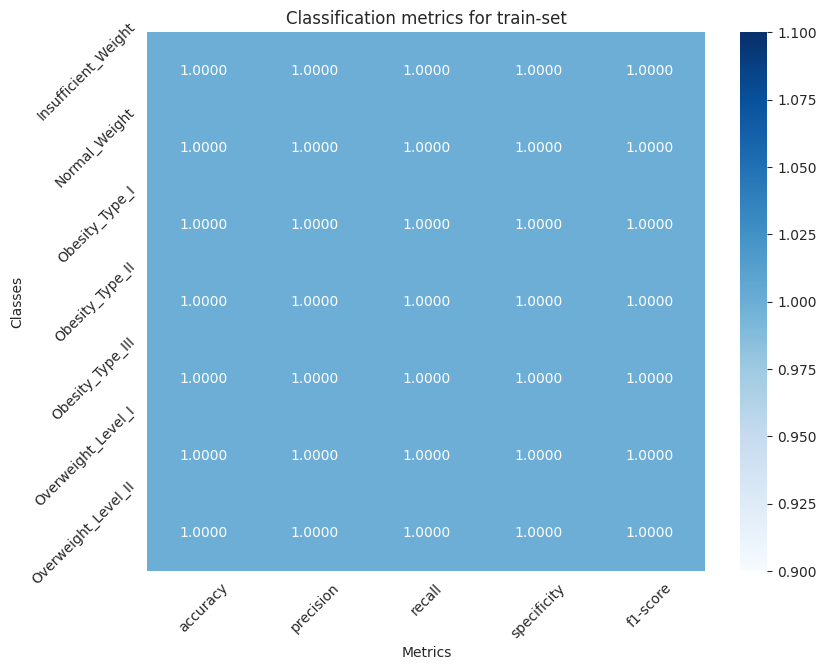

In [ ]:
metrics_train_xg = eval_knn.calculate_metrics_by_class(cmxg_train, classes)
eval_xg.plot_metrics_by_class(metrics_train_xg, "Classification metrics for train-set")

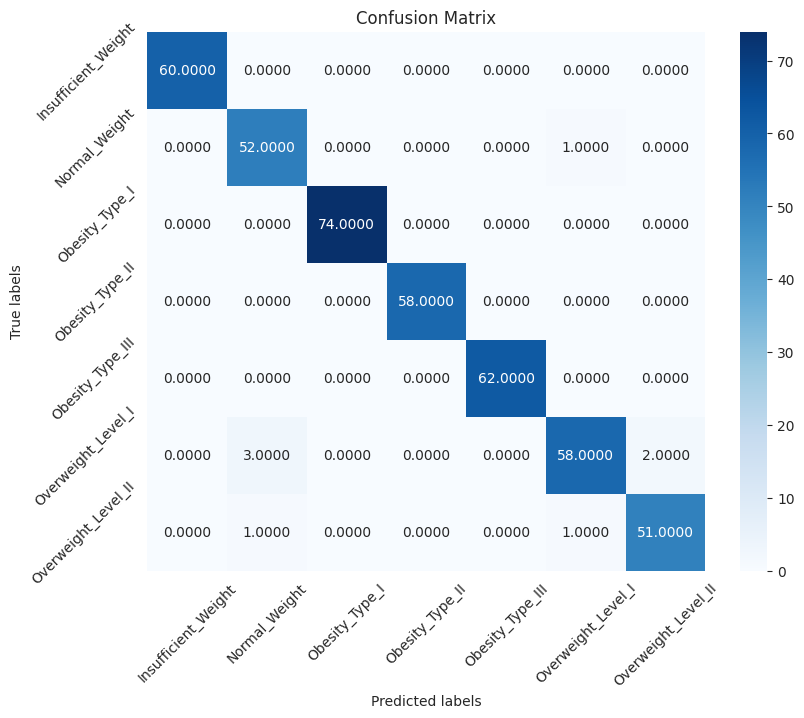

In [ ]:
# get confusion matrix in testing
y_pred = rec_xg.predict(x_test)
cmxg_test = eval_xg.get_confusion_matrix(le.fit_transform(y_test), y_pred, le.fit_transform(classes))
eval_xg.plot_confusion_matrix(cmxg_test, classes)

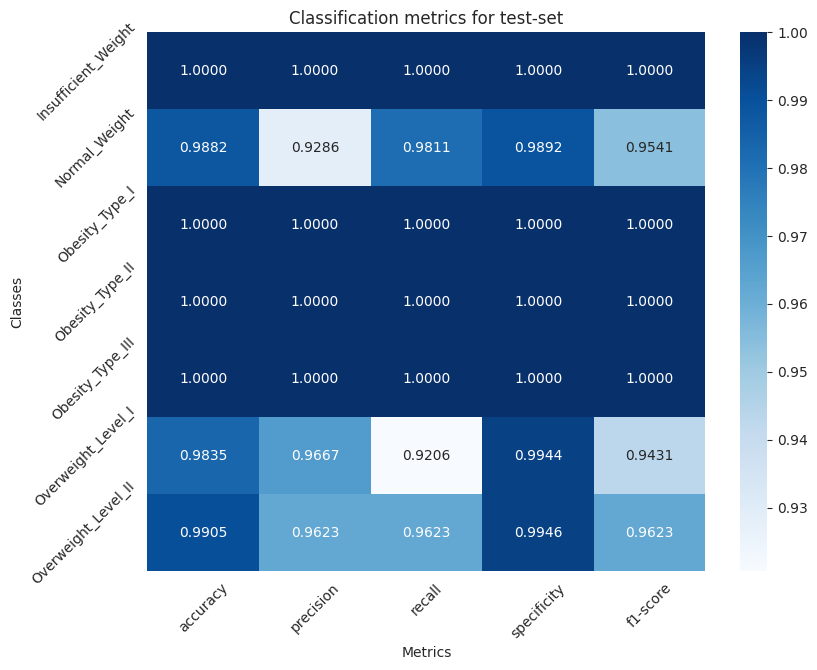

In [ ]:
metrics_test_xg = eval_xg.calculate_metrics_by_class(cmxg_test, classes)
eval_xg.plot_metrics_by_class(metrics_test_xg, "Classification metrics for test-set")

In [ ]:
# calculate the metrics for whole test set
eval_xg.calculate_metrics_xall(cmxg_test, metrics_test_xg)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.981087,0.979643,0.980576,0.99689,0.979926


Monitoring using Benchmarks